### 1. 결측치 처리 (평균값, 최빈값)

In [1]:
import pandas as pd

In [ ]:
# 1. 결측치 처리 (평균값, 최빈값)
# 살았다 죽었다. 판단. 이것도 분류
ㄴ
# train.csv 불러오기
df_1 = pd.read_csv('train.csv')

# df_1.head() # 데이터셋 확인 
df_1.info()

# 결측치 확인

df_1.isnull().sum()  # Age, Embarked, Cabin 에서의 결측치 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
# Age 열의 결측치는 평균값으로 대체합니다.
df_1['Age'] = df_1['Age'].fillna(df_1['Age'].mean())

# Embarked 열의 결측치는 최빈값(Mode)으로 대체합니다.
df_1['Embarked'] = df_1['Embarked'].fillna(df_1['Embarked'].mode()[0])

# Cabin 열은 결측치가 너무 많아서 삭제합니다.
df_1.drop(columns=['Cabin'], inplace=True)

# 데이터 확인
df_1.info()
df_1.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### 2. 중복 데이터 제거

In [4]:
import pandas as pd

# 1. 가짜 데이터 생성
data = {
    'ProductID': [101, 102, 103, 104, 101, 102, 103, 105, 106, 101],
    'ProductName': ['A', 'B', 'C', 'D', 'A', 'B', 'C', 'E', 'F', 'A'],
    'Price': [100, 200, 300, 400, 100, 200, 300, 500, 600, 100],
    'Quantity': [1, 2, 3, 4, 1, 2, 3, 5, 6, 1]
}

# 2. DataFrame 생성
df = pd.DataFrame(data)

# 3. 중복된 데이터를 일부 추가 (중복된 행 4개 추가)
df.loc[len(df.index)] = [101, 'A', 100, 1]  # 중복 행 추가
df.loc[len(df.index)] = [102, 'B', 200, 2]  # 중복 행 추가
df.loc[len(df.index)] = [103, 'C', 300, 3]  # 중복 행 추가
df.loc[len(df.index)] = [104, 'D', 400, 4]  # 중복 행 추가

# 4. CSV 파일로 내보내기
df.to_csv('sales.csv', index=False)

print("sales.csv 파일이 생성되었습니다.")

sales.csv 파일이 생성되었습니다.


In [5]:
# 2. 중복 데이터 제거

# csv 파일 불러오기
df_2 = pd.read_csv('sales.csv')

# 중복된 데이터의 개수를 출력하세요.
duplicated = df_2.duplicated().sum() # 중복 개수.

print(df_2.shape) # (14, 4)   인 것을 확인
print('dupli : ', duplicated)

print('----------------------------------')
# 중복된 행을 모두 제거한 후, 남은 데이터의 개수를 확인하세요.
df_2_del = df_2.drop_duplicates()   # 중복을 제거하는 메서드
print('dupli: ', df_2_del.duplicated().sum()) # 중복 개수.
print(df_2_del.shape) # (6,4) 

(14, 4)
dupli :  8
----------------------------------
dupli:  0
(6, 4)


### 3. 이상치 제거 (IQR 이용)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

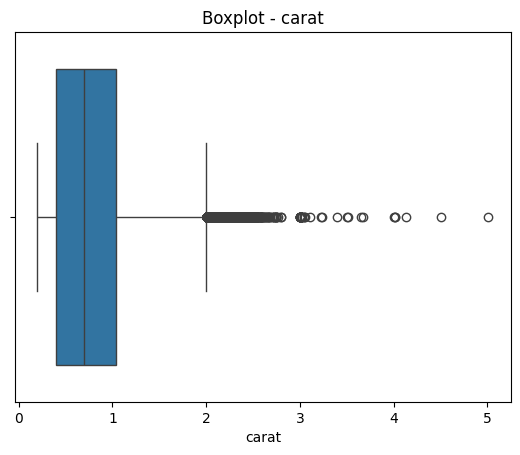

(53940, 11)


In [14]:
# 3. 이상치 제거

# diamonds.csv 데이터셋 불러오기
df_3 = pd.read_csv('diamonds.csv')

# 이상치 확인을 위해 박스 플롯을 이용
sns.boxplot(x=df_3['carat'])
plt.title('Boxplot - carat')
plt.show()

print(df_3.shape)   # 이상치 제거 하기 전 개수를 확인하기 위한 출력

In [21]:
# IQR 계산 
Q1 = df_3['carat'].quantile(0.25) # 25% 분위수
Q3 = df_3['carat'].quantile(0.75) # 75% 분위수
IQR = Q3 - Q1

# 이상치 경계 계산
lower_ = Q1 - 1.5 * IQR
upper_ = Q3 + 1.5 * IQR

# 이상치의 경계를 계산하여 하한(lower bound)과 상한(upper bound) 값을 출력하세요.
print('lower bound : ', lower_)
print('upper bound: ', upper_)
df_3_outer = df_3[(df_3['carat'] < lower_) | (df_3['carat'] > upper_)]
print(df_3_outer)
# carat 열에서 IQR 방식을 사용하여 이상치를 제거하세요.
# 이상치는 Q1 - 1.5 * IQR 보다 작거나, Q3 + 1.5 * IQR 보다 큰 경우로 정의합니다.
df_3_iqr = df_3[(df_3['carat'] >= lower_) & (df_3['carat'] <= upper_)]

# 이상치를 제거한 후 데이터의 개수를 출력하세요.
print('이상치를 제거한 뒤 데이터셋')
print(df_3_iqr.shape)   # 이상치 제거 후 데이터의 개수 (53940 -> 52051)
df_3_iqr

lower bound :  -0.5599999999999999
upper bound:  2.0
       Unnamed: 0  carat      cut color clarity  depth  table  price     x  \
12246       12247   2.06  Premium     J      I1   61.2   58.0   5203  8.10   
13002       13003   2.14     Fair     J      I1   69.4   57.0   5405  7.74   
13118       13119   2.15     Fair     J      I1   65.5   57.0   5430  8.01   
13757       13758   2.22     Fair     J      I1   66.7   56.0   5607  8.04   
13991       13992   2.01     Fair     I      I1   67.4   58.0   5696  7.71   
...           ...    ...      ...   ...     ...    ...    ...    ...   ...   
27741       27742   2.15    Ideal     G     SI2   62.6   54.0  18791  8.29   
27742       27743   2.04  Premium     H     SI1   58.1   60.0  18795  8.37   
27744       27745   2.29  Premium     I     SI1   61.8   59.0  18797  8.52   
27746       27747   2.07    Ideal     G     SI2   62.5   55.0  18804  8.20   
27749       27750   2.29  Premium     I     VS2   60.8   60.0  18823  8.50   

          

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


### 4. 범주형 데이터 인코딩


In [26]:
from sklearn.preprocessing import LabelEncoder # Label 인코딩을 위한 선언

In [ ]:
# adult.csv 데이터셋 불러오기
df_4 = pd.read_csv('adult.csv')

# 데이터셋 출력 (어떻게 생겼는가)
df_4.head() # 5개만 출력

# workclass, education, marital-status, occupation,
# relationship, race, gender, native-country 이 범주형인 것으로 확인

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [29]:
# 분류 모델 가능 -> 나중에 해보기
# 데이터셋을 불러온 후, 범주형 데이터를 인코딩하는 코드를 작성하세요.
# workclass, education, marital-status, occupation,
# relationship, race, gender, native-country 열을 Label Encoding으로 변환

label = LabelEncoder() # 인코딩을 위한 객체 

df_4['workclass'] = label.fit_transform(df_4['workclass'])

df_4['education'] = label.fit_transform(df_4['education'])

df_4['marital-status'] = label.fit_transform(df_4['marital-status'])

df_4['occupation'] = label.fit_transform(df_4['occupation'])

df_4['relationship'] = label.fit_transform(df_4['relationship'])

df_4['race'] = label.fit_transform(df_4['race'])

df_4['gender'] = label.fit_transform(df_4['gender'])

df_4['native-country'] = label.fit_transform(df_4['native-country'])

df_4.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39,<=50K
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39,<=50K
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,39,>50K
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,39,>50K
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,39,<=50K


### 5. 데이터 스케일링

In [31]:
# StandardScaler 를 사용하여 데이터를 표준화
from sklearn.preprocessing import StandardScaler

# winequality-red.csv데이터 불러오기
df_5 = pd.read_csv('winequality-red.csv')
df_5.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# fixed acidity, volatile acidity, citric acid, residual sugar, chlorides 열의 값을

# StandardScaler로 표준화하세요.
scaler_standard = StandardScaler()

df_5['fixed acidity'] = scaler_standard.fit_transform(df_5[['fixed acidity']])
df_5['volatile acidity'] = scaler_standard.fit_transform(df_5[['volatile acidity']])
df_5['citric acid'] = scaler_standard.fit_transform(df_5[['citric acid']])
df_5['residual sugar'] = scaler_standard.fit_transform(df_5[['residual sugar']])
df_5['chlorides'] = scaler_standard.fit_transform(df_5[['chlorides']])

# 표준화된 결과를 출력하세요.
df_5.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,11.0,34.0,0.9978,3.51,0.56,9.4,5
